# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#**** Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #**** Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #**** Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #**** Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ust'-kut
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | mahanje
Processing Record 8 of Set 1 | ginir
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | vernon
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | nantucket
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | nchelenge
Processing Record 19 of Set 1 | fada n'gourma
Processing Record 20 of Set 1 | azangaro
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | adamstown
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,9.93,69,21,0.45,US,1707516720
1,edinburgh of the seven seas,-37.0676,-12.3116,19.71,93,99,10.68,SH,1707516890
2,blackmans bay,-43.0167,147.3167,13.18,57,27,0.45,AU,1707516889
3,albany,42.6001,-73.9662,10.25,59,21,0.45,US,1707516741
4,ust'-kut,56.7938,105.7672,-9.76,96,100,2.24,RU,1707517402


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('../output_data/cities.csv', index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv('../output_data/cities.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.93,69,21,0.45,US,1707516720
1,edinburgh of the seven seas,-37.0676,-12.3116,19.71,93,99,10.68,SH,1707516890
2,blackmans bay,-43.0167,147.3167,13.18,57,27,0.45,AU,1707516889
3,albany,42.6001,-73.9662,10.25,59,21,0.45,US,1707516741
4,ust'-kut,56.7938,105.7672,-9.76,96,100,2.24,RU,1707517402


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

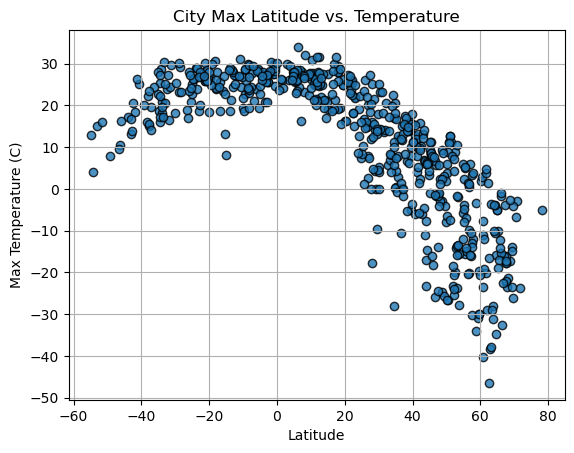

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

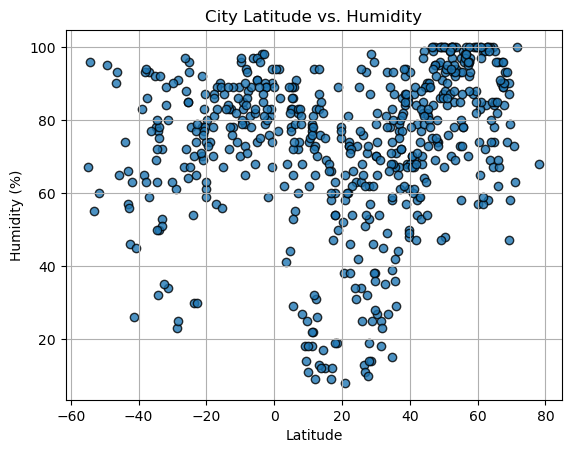

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")          

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

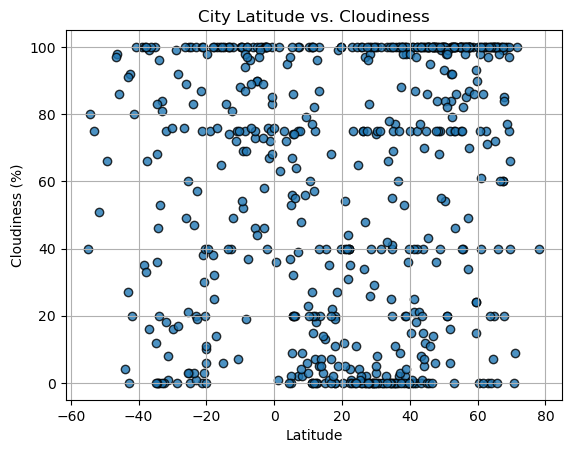

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

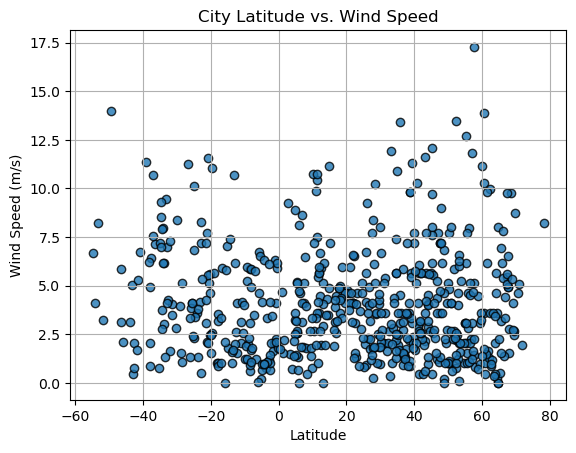

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_value, y_value, x_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel('Latitude')
    print(f"The r-value is: {rvalue} ")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.93,69,21,0.45,US,1707516720
3,albany,42.6001,-73.9662,10.25,59,21,0.45,US,1707516741
4,ust'-kut,56.7938,105.7672,-9.76,96,100,2.24,RU,1707517402
5,college,64.8569,-147.8028,-5.11,74,100,0.00,US,1707516820
7,ginir,7.1333,40.7000,16.21,60,2,1.83,ET,1707517403


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,19.71,93,99,10.68,SH,1707516890
2,blackmans bay,-43.0167,147.3167,13.18,57,27,0.45,AU,1707516889
6,mahanje,-9.9333,35.3333,19.42,96,100,1.21,TZ,1707517403
8,port-aux-francais,-49.3500,70.2167,7.86,95,66,14.00,TF,1707516889
12,ushuaia,-54.8000,-68.3000,12.81,67,40,6.69,AR,1707516759


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8310360935653366 


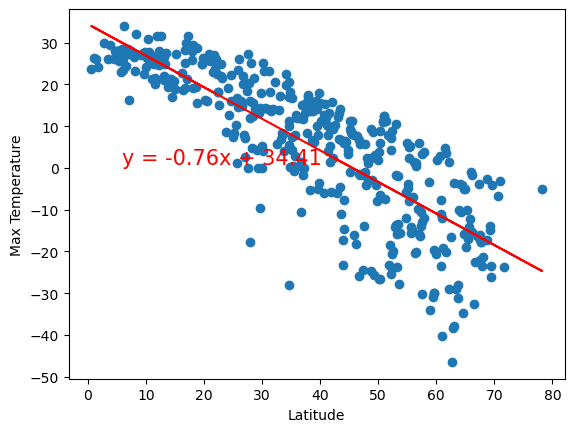

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel('Max Temperature')

create_linear_regression_plot(x_values, y_values, 'Latitude')

The r-value is: 0.5702367791962903 


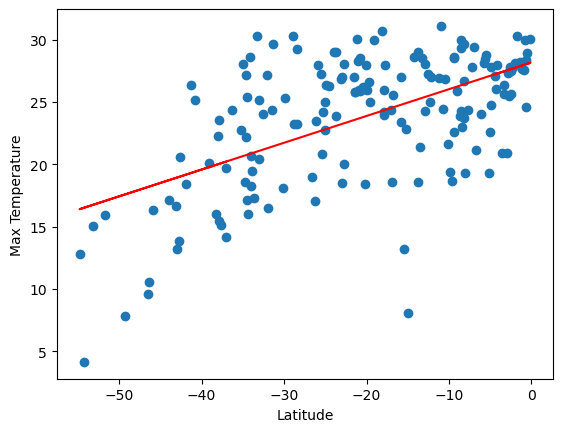

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel('Max Temperature')

create_linear_regression_plot(x_values, y_values, 'Latitude')

In the Northern Hemisphere, a correlation coefficient of -0.83 indicates a very strong negative association between maximum temperature and latitude; as latitude increases, the maximum temperature tends to decrease significantly.

In the Southern Hemisphere, a correlation coefficient of 0.57 indicates a moderate positive association between mimumax temperature and latitude; as latitude increase, the maximum temperature tends to increase significantly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44110147930287275 


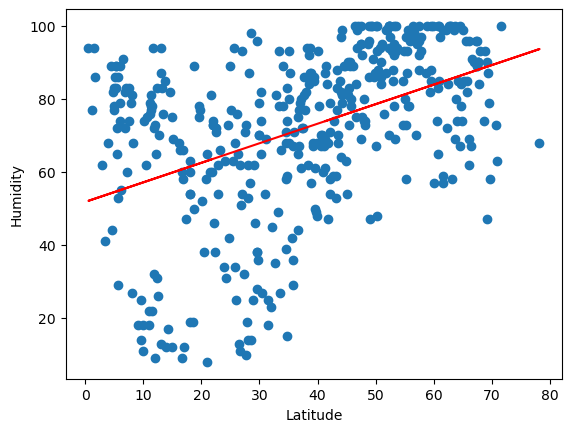

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel('Humidity')

create_linear_regression_plot(x_values, y_values, 'Latitude')

The r-value is: 0.36006920180699686 


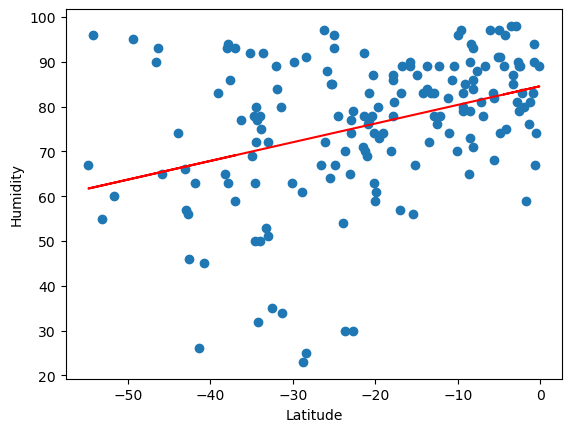

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel('Humidity')

create_linear_regression_plot(x_values, y_values, 'Latitude')

In the Northern Hemisphere, a correlation coefficient of 0.44, indicating a moderate positive association between humidity and latitude. In the Southern Hemisphere, a correlation coefficient of 0.36 indicates a weak positive association between humidity and latitude. This means that there is a tendency for humidity to increase as latitude increases, albeit to different extents in the two hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3464886461277736 


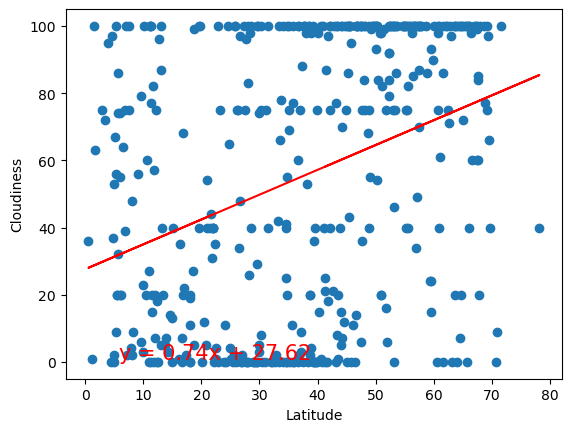

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')

create_linear_regression_plot(x_values, y_values, 'Latitude')

The r-value is: 0.26784093516472407 


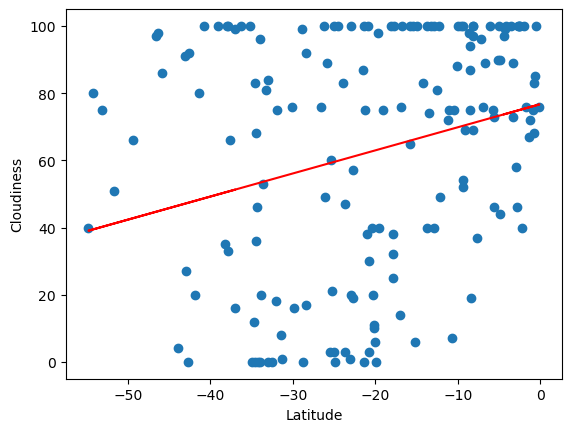

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')

create_linear_regression_plot(x_values, y_values, 'Latitude')

A correlation coefficient of 0.34 in the Northern Hemisphere and 0.27 in the Southern Hemisphere both indicate weak positive associations between cloudiness and latitude. This means that as latitude increases, there is a tendency for cloudiness to increase, although the relationship is weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018512821668810363 


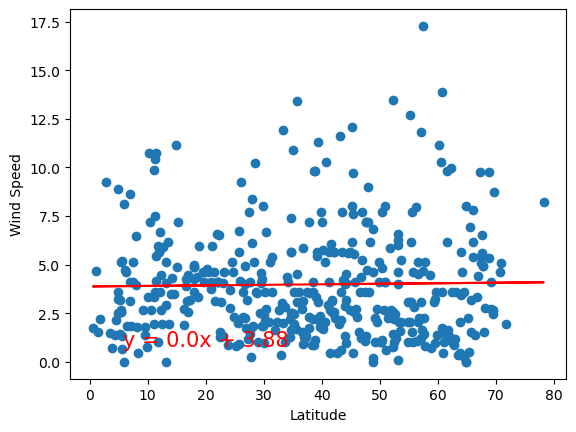

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')

create_linear_regression_plot(x_values, y_values, 'Latitude')

The r-value is: -0.31692221431479495 


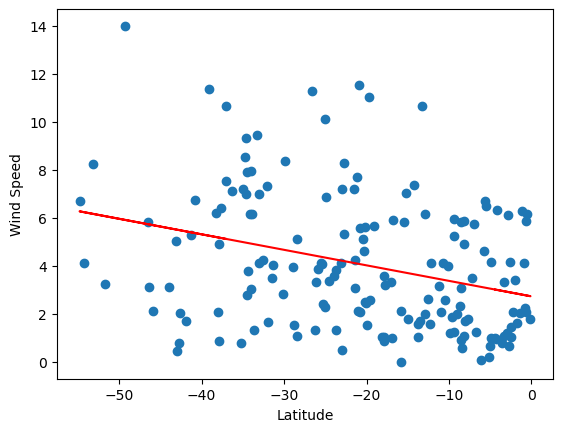

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')

create_linear_regression_plot(x_values, y_values, 'Latitude')

In the Northern Hemisphere, a correlation coefficient of 0.02 indicates a very weak positive or no association between wind speed and latitude, and in the Southern Hemisphere, a correlation coefficient of -0.31 indicates a weak negative association between wind speed and latitude. 